In [1]:
import hssm 
import bambi as mbm 
import jax 
import pytensor as pt 

In [ ]:
cav_data = hssm.load_data("cavanagh_theta")
model = hssm.HSSM(
    model="ddm",
    data=cav_data,
    include=[
        {
            "name": "v",
            "prior": {
                "Intercept": {"name": "Normal", "mu": 0.0, "sigma": 1.0},
                "theta": {"name": "Normal", "mu": 0.0, "sigma": 1.0},
            },
            "formula": "v ~ theta + (1|participant_id)",
            "link": "identity",
        },
    ],
)


Model initialized successfully.


In [2]:
hssm.HSSM.supported_models

('ddm',
 'ddm_sdv',
 'full_ddm',
 'angle',
 'levy',
 'ornstein',
 'weibull',
 'race_no_bias_angle_4',
 'ddm_seq2_no_bias',
 'lba3',
 'lba2',
 'exgauss')

In [3]:
# simulate exgauss data 
mu = 0.5 
sigma = 0.05 
tau = 0.3
SEED = 666

ex_gauss_data = hssm.simulate_data(
    model="exgauss",
    theta=dict(mu=mu, sigma=sigma, tau=tau, p=1),
    size=500,
    random_state = SEED
)
ex_gauss_data.head()

,rt,response
0,0.732965,1.0
1,0.888760,1.0
2,0.673537,1.0
3,0.744971,1.0
4,1.368209,1.0


In [ ]:
# # pytensor implementation of exgaussian likelihood
# def log_exgaussian_likelihood(rt, choice, mu, sigma, tau):
#     from pytensor.tensor import as_tensor_variable, log, sqrt, exp
#     from pytensor.tensor.extra_ops import erfc

#     rt = pt.abs(rt)
#     choice = choice 
#     mu = as_tensor_variable(mu)
#     sigma = as_tensor_variable(sigma)
#     tau = as_tensor_variable(tau)

#     z = (rt - mu) / sigma
#     llik = log(0.5 / tau) + (0.5 * (sigma / tau) ** 2 - z / tau) + log(
#         erfc((1 / sqrt(2)) * (z / (sigma / tau) - (sigma / tau)))
#     )
#     return llik


In [ ]:
model = hssm.HSSM(
    model = "exgauss", 
    data = ex_gauss_data,  
    loglik_kind='analytical', 
   
)

/oscar/data/frankmj/azhang/HSSM/src/hssm/hssm.py:497: UserWarning: You set choices to be [-1, 1], but [-1] are missing from your dataset.
  self._post_check_data_sanity()


params_only:  False
params_is_reg:  None
Model initialized successfully.


In [9]:
model

Hierarchical Sequential Sampling Model
Model: exgauss

Response variable: rt,response
Likelihood: analytical
Observations: 500

Parameters:

mu:
    Prior: Uniform(lower: 0.0, upper: 50.0)
    Explicit bounds: (0.0, 50.0)

sigma:
    Prior: Uniform(lower: 0.0, upper: 50.0)
    Explicit bounds: (0.0, 50.0)

tau:
    Prior: Uniform(lower: 0.0, upper: 50.0)
    Explicit bounds: (0.0, 50.0)

p:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)


Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 20.0)

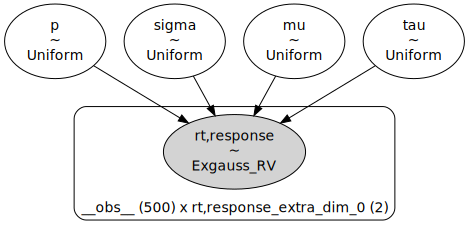

In [8]:
model.graph()

In [10]:
infer_data_mcmc_exgauss = model.sample(
    sampler = 'mcmc',
    cores = 1, 
    chains = 2,
    draws = 500,
    tune = 500, 
    idata_kwargs = {"log_likelihood": True},)

Using default initvals. 



Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p, sigma, tau, mu]


Output()

NotImplementedError: Cannot convert JitTracer<float64[500,2]> to a tensor variable.
Apply node that caused the error: LANLogpOp(rt,response{[[0.732965 ... ]]}, Alloc.0, ExpandDims{axis=0}.0, ExpandDims{axis=0}.0, ExpandDims{axis=0}.0)
Toposort index: 15
Inputs types: [TensorType(float64, shape=(500, 2)), TensorType(float64, shape=(500,)), TensorType(float64, shape=(1,)), TensorType(float64, shape=(1,)), TensorType(float64, shape=(1,))]
Inputs shapes: [(500, 2), (500,), (1,), (1,), (1,)]
Inputs strides: [(16, 8), (8,), (8,), (8,), (8,)]
Inputs values: ['not shown', 'not shown', array([25.]), array([25.]), array([0.5])]
Outputs clients: [[SpecifyShape(LANLogpOp.0, 500)]]

Backtrace when the node is created (use PyTensor flag traceback__limit=N to make it longer):
  File "/oscar/data/frankmj/azhang/HSSM/.venv/lib/python3.11/site-packages/pymc/model/core.py", line 695, in logp
    rv_logps = transformed_conditional_logp(
  File "/oscar/data/frankmj/azhang/HSSM/.venv/lib/python3.11/site-packages/pymc/logprob/basic.py", line 575, in transformed_conditional_logp
    temp_logp_terms = conditional_logp(
  File "/oscar/data/frankmj/azhang/HSSM/.venv/lib/python3.11/site-packages/pymc/logprob/basic.py", line 505, in conditional_logp
    node_logprobs = _logprob(
  File "/users/azhan378/.local/share/uv/python/cpython-3.11.13-linux-x86_64-gnu/lib/python3.11/functools.py", line 909, in wrapper
    return dispatch(args[0].__class__)(*args, **kw)
  File "/oscar/data/frankmj/azhang/HSSM/.venv/lib/python3.11/site-packages/pymc/distributions/distribution.py", line 140, in logp
    return class_logp(value, *dist_params)
  File "/oscar/data/frankmj/azhang/HSSM/src/hssm/distribution_utils/dist.py", line 515, in logp
    logp = loglik(data, *dist_params, *extra_fields)
  File "/oscar/data/frankmj/azhang/HSSM/.venv/lib/python3.11/site-packages/pytensor/graph/op.py", line 293, in __call__
    node = self.make_node(*inputs, **kwargs)
  File "/oscar/data/frankmj/azhang/HSSM/src/hssm/distribution_utils/jax.py", line 74, in make_node
    outputs = [pt.vector()]

HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.